# Hrvatsko stanovništvo — jučer, danas, sutra

&nbsp; 

Članak je dostupan na [medium.com](https://medium.com/@narimiran/hrvatsko-stanovnistvo-jucer-danas-sutra-591629462fd8), ovdje se nalazi samo Python kod.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (7.0, 5.0)
plt.rcParams['font.size'] = 8
plt.rcParams['figure.titlesize'] = 9
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 9
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 8

In [3]:
# http://www.census.gov/population/international/data/idb/informationGateway.php
df = pd.read_csv('./datasets/croatia_demography_1991-2040.csv')

totals = df[df.Age == 'Total'].copy()
df = df[~(df.Age == 'Total')]

not_needed = ['Country', 'Both Sexes Population', 'Percent Both Sexes', 
              'Percent Male', 'Percent Female', 'Sex Ratio']
df = df.drop(not_needed, axis=1)
df = df.rename(columns={'Male Population': 'Male', 'Female Population': 'Female'})

df.head()

,Year,Age,Male,Female
1,1991,0-4,139515,133494
2,1991,5-9,158294,150930
3,1991,10-14,166563,159915
4,1991,15-19,159629,153664
5,1991,20-24,151095,147512


In [4]:
dfy = pd.read_csv('./datasets/croatia_yearly_1991-2040.csv')
dfy = dfy[~(dfy.Age == 'Total')]

def get_ages(age):
    try:
        return int(age)
    except ValueError:
        aggs = {'85-89': 87, '90-94': 92, '95-99': 97, '100+': 100}
        return aggs[age]
    
dfy['Age'] = dfy.Age.map(get_ages)

not_needed = ['Country', 'Both Sexes Population', 'Percent Both Sexes', 
              'Percent Male', 'Percent Female', 'Sex Ratio']
dfy = dfy.drop(not_needed, axis=1)

dfy['Male Ages'] = dfy.Age * dfy['Male Population']
dfy['Female Ages'] = dfy.Age * dfy['Female Population']
dfy.head()

,Year,Age,Male Population,Female Population,Male Ages,Female Ages
1,1991,0,27030,25873,0,0
2,1991,1,27313,26101,27313,26101
3,1991,2,27653,26420,55306,52840
4,1991,3,28585,27391,85755,82173
5,1991,4,28934,27709,115736,110836


In [5]:
def plot_yearly_pyramid(year, filename=None):
    def draw_line():
        male_sum = dfy.loc[dfy.Year == year, 'Male Ages'].sum()
        male_tot = totals.loc[totals.Year == year, 'Male Population']
        male_avg = float(male_sum / male_tot)
        ax1.axhline(male_avg/5 - 0.5, color=color, lw=0.5)
        ax1.text(198000, male_avg/5 - 0.3, '{:.2f}'.format(male_avg), color=color)
        
        female_sum = dfy.loc[dfy.Year == year, 'Female Ages'].sum()
        female_tot = totals.loc[totals.Year == year, 'Female Population']
        female_avg = float(female_sum / female_tot)
        ax2.axhline(female_avg/5 - 0.5, color=color, lw=0.5)
        ax2.text(198000, female_avg/5 - 0.3, '{:.2f}'.format(female_avg), 
                 ha='right', color=color)
        
        
    y = df[df.Year == year].set_index('Age')
    m = y.Male
    f = y.Female
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    if year <= 2016:
        alpha = 1
        color = 'k'
    else:
        alpha = (2016/year)**60
        color = '#666666'
    m.plot(kind='barh', width=1, ax=ax1, color='#348ABD', alpha=alpha, legend=False)
    f.plot(kind='barh', width=1, ax=ax2, legend=False, alpha=alpha)

    
    for ax in [ax1, ax2]:
        ax.set_ylabel('')
        ax.tick_params(axis='both', length=0)
        ax.set_xlim(0, 200000)
        ax.set_xticks(np.arange(0, 200001, 20000))
        ax.set_xticklabels(np.arange(0, 200, 20))
        ax.grid(b=False, axis='y')
        

    _ = (ax1.invert_xaxis(),
         ax.set_ylabel(''),
         plt.subplots_adjust(wspace=0.12, left=0.02, right=0.98, bottom=0.05, top=0.95),
         plt.suptitle(year, x=0.5),
         ax1.set_title('Muškarci'),
         ax2.set_title('Žene'),
         ax1.set_yticklabels(''),
         ax2.set_yticklabels(f.index, ha='center', position=(-0.025, None)),
         draw_line()
         
        )
    
    if filename:
        plt.savefig('./figures/gif_source/cro_demo_pyramid_{}.png'.format(filename))
        plt.close(fig)

        
# for year in range(1991, 2041, 1):
#     plot_yearly_pyramid(year, filename=year)

<img src="./figures/cro_demo_01.gif">

---

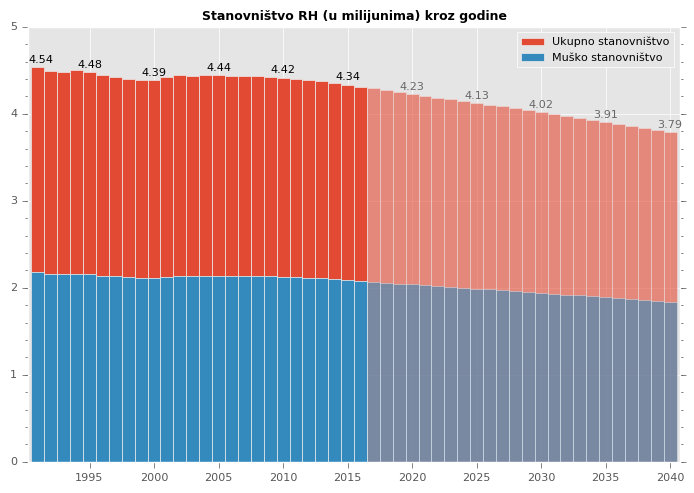

In [6]:
male_totals = (totals[['Year', 'Male Population']]
               .set_index('Year')
               .rename(columns={'Male Population': 'Muško stanovništvo'})
              )
males_1 = male_totals.copy()
males_1.ix[2017:] = 0


tot = (totals[['Year', 'Both Sexes Population']]
       .set_index('Year')
       .rename(columns={'Both Sexes Population': 'Ukupno stanovništvo'})
      )
tot_1 = tot.copy()
tot_1.ix[2017:] = 0

fig, ax = plt.subplots()

tot.plot(kind='bar', width=1, ax=ax, alpha=0.6, legend=False)
tot_1.plot(kind='bar', width=1, ax=ax)
male_totals.plot(ax=ax, kind='bar', width=1, color='#348ABD', 
                 alpha=0.6, legend=False)
males_1.plot(ax=ax, kind='bar', width=1, color='#348ABD')


for bar, value in zip(ax.patches[4::5], tot['Ukupno stanovništvo'][4::5].values):
    x = bar.get_x()
    y = bar.get_height()
    dx = bar.get_width() / 2
    dy = ax.get_ybound()[1] / 100
    c = 'k' if x < 25 else '#666666'
    ax.text(x+dx, y+dy, '{:.2f}'.format(value/1000000), ha='center', color=c)

y = tot['Ukupno stanovništvo'].values[0]
ax.text(0.2, y+dy, '{:.2f}'.format(y/1000000), ha='center', color='k')


_ = (ax.set_ylim(0, 5000000),
     ax.set_xticks(np.arange(4, 50, 5)),
     ax.yaxis.set_ticks(np.arange(0, 5000000, 200000), minor=True),
     ax.set_xticklabels(tot.index[4::5], rotation=0),
     ax.set_yticklabels(np.arange(0, 6, 1)),
     ax.set_xlabel(''),
     ax.tick_params(axis='x', top='off'),
     ax.set_title('Stanovništvo RH (u milijunima) kroz godine'),
     plt.tight_layout(),
     plt.savefig('./figures/cro_demo_02.png'),
    )

---

In [7]:
dfcy = pd.read_csv('./datasets/croatia_census_2011b.csv')

dfcy = dfcy.drop(['UNIT', 'TIME', 'Flag and Footnotes'], axis=1)

dfcy.loc[dfcy.Value == ':', 'Value'] = np.nan
dfcy['Value'] = dfcy.Value.str.replace(',', '').astype(float)
dfcy.loc[dfcy.AGE == 'Less than 1 year', 'AGE'] = '0 years'
dfcy['GEO'] = dfcy.GEO.map(lambda x: x.replace(' zupanija', ''))

total_pop = dfcy.AGE == 'Total'
totals_dfcy = dfcy[total_pop].copy()
dfcy = dfcy[~total_pop]

dfcy['AGE'] = dfcy['AGE'].map(lambda x: int(x.split()[0]))
dfcy['Ages'] = dfcy.AGE * dfcy.Value

dfcy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6666 entries, 3 to 6731
Data columns (total 5 columns):
GEO      6666 non-null object
AGE      6666 non-null int64
SEX      6666 non-null object
Value    6553 non-null float64
Ages     6553 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 312.5+ KB


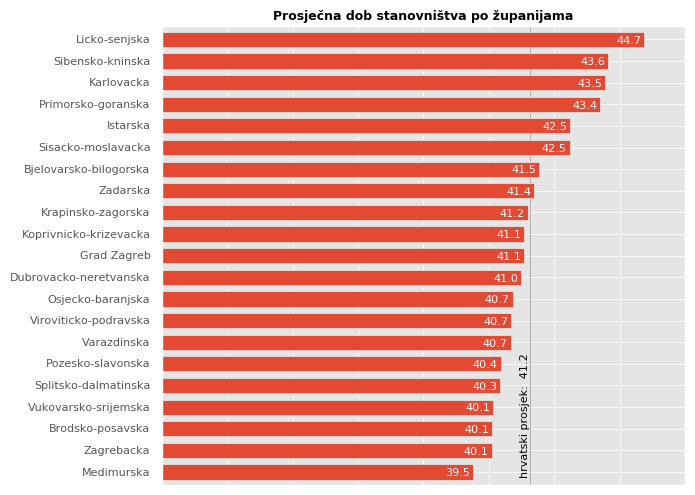

In [8]:
total_ages = dfcy.groupby(['GEO', 'SEX'])['Ages'].sum().unstack()
total_people = totals_dfcy.groupby(['GEO', 'SEX'])['Value'].sum().unstack()

avg_ages = total_ages / total_people
avg_ages

cro_avg_age = avg_ages[avg_ages.index == 'Croatia'].copy()
avg_ages = avg_ages[~(avg_ages.index == 'Croatia')].sort_values(by='Total')


fig, ax = plt.subplots()
avg_ages['Total'].plot(kind='barh', width=0.7, ax=ax, zorder=2)

avg_cro = cro_avg_age['Total'].values[0]

for bar, value in zip(ax.patches, avg_ages['Total'].values):
    x = bar.get_width()
    y = bar.get_y()
    dx = ax.get_xbound()[1] / 500
    dy = 0.45 * bar.get_height()
    ax.text(x-dx, y+dy, '{:.1f}'.format(value), va='center', ha='right', color='white')

_ = (ax.set_title('Prosječna dob stanovništva po županijama'),
     ax.set_ylabel(''),
     ax.set_xlim((30, 46)),
     ax.tick_params(axis='both', length=0),
     ax.axvline(avg_cro, color='#999999', zorder=1, lw=0.5),
     ax.text(avg_cro, -0.25,  'hrvatski prosjek:  {:.1f}'.format(avg_cro), 
             fontsize=8, rotation=90, ha='right', va='bottom'),
     ax.set_xticklabels([]),
     plt.tight_layout(),
     plt.savefig('./figures/cro_demo_03.png')
    )


---

In [9]:
# Eurostat: Population by single year of age and NUTS 3 region
dfc = pd.read_csv('./datasets/croatia_census_2011.csv')

dfc = dfc[~dfc.GEO.str.contains('Hrvatska')]
dfc = dfc.drop(['UNIT', 'TIME', 'Flag and Footnotes'], axis=1)

dfc.loc[dfc.Value == ':', 'Value'] = np.nan
dfc['Value'] = dfc.Value.str.replace(',', '').astype(float)

dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8448 entries, 0 to 9599
Data columns (total 4 columns):
AGE      8448 non-null object
GEO      8448 non-null object
SEX      8448 non-null object
Value    8335 non-null float64
dtypes: float64(1), object(3)
memory usage: 330.0+ KB


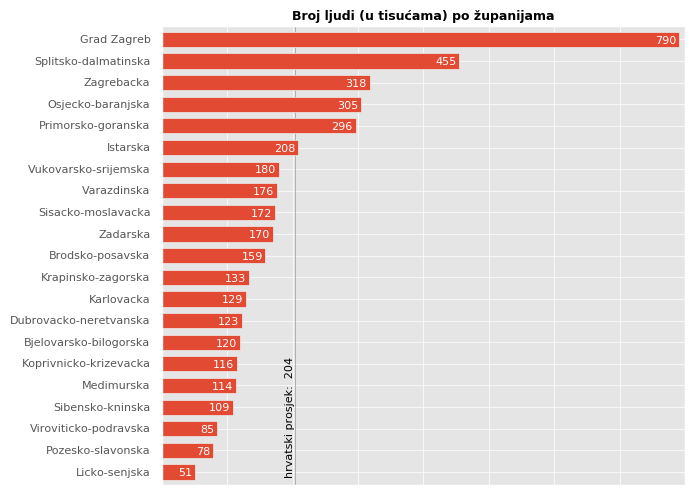

In [10]:
total = dfc[dfc.AGE == 'Total'].copy()

total = total[~(total.GEO == 'Croatia')]
total['Value'] = total.Value.astype(int)
total['GEO'] = total.GEO.map(lambda x: x.replace(' zupanija', ''))


total_per_county = (total[total.SEX == 'Total']
                    .groupby(['GEO'])['Value'].sum()
                    .sort_values()
                   )
avg_per_county = total_per_county.mean()


fig, ax = plt.subplots()
total_per_county.plot(kind='barh', width=0.7, ax=ax, zorder=2)

for bar, value in zip(ax.patches, total_per_county.values):
    x = bar.get_width()
    y = bar.get_y()
    dx = ax.get_xbound()[1] / 200
    dy = 0.45 * bar.get_height()
    ax.text(x-dx, y+dy, '{:.0f}'.format(value/1000), 
            va='center', ha='right', color='white')

_ = (ax.set_title('Broj ljudi (u tisućama) po županijama'),
     ax.set_ylabel(''),
     ax.tick_params(axis='both', length=0),
     ax.set_xticklabels([]),
     ax.axvline(avg_per_county, color='#999999', zorder=1, lw=0.5),
     ax.text(avg_per_county, -0.25,  
             'hrvatski prosjek:  {:.0f}'.format(avg_per_county/1000), 
             fontsize=8, rotation=90, ha='right', va='bottom'),
     plt.tight_layout(),
     plt.savefig('./figures/cro_demo_04.png'),
    )

---

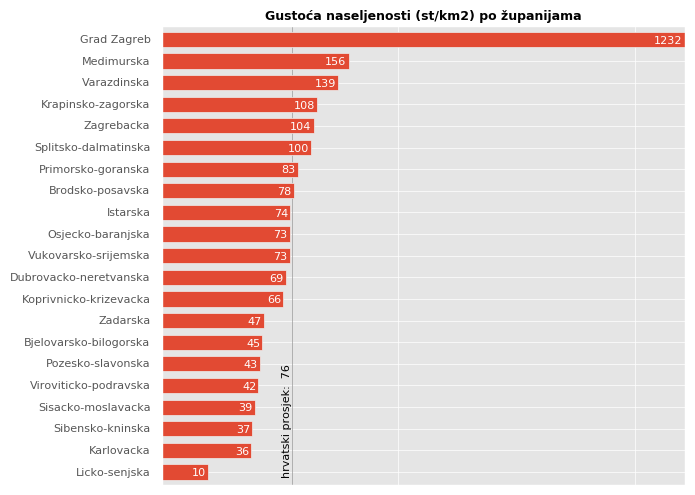

In [11]:
# Wikipedia
zup = pd.read_csv('./datasets/croatia_counties_size.csv', encoding='Windows-1250', 
                  header=None, names=['name', 'area'])
zup['name'] = zup.name.map(lambda x: x.replace(' županija', ''))

zup['name'] = (zup.name.str.replace('č', 'c')
                       .str.replace('ž', 'z')
                       .str.replace('Š', 'S')
                       .str.replace('š', 's')
                       .str.replace('đ', 'd')
                       .str.strip()
              )
zup = zup.set_index('name')
zup_area = zup.sort_index()['area']

density = (total_per_county / zup.area).sort_values()

cro_area = 56594
cro_total_pop = dfc[(dfc.GEO == 'Croatia') & (dfc.AGE == 'Total') & (dfc.SEX == 'Total')]['Value'].values
cro_density = (cro_total_pop / cro_area)[0]

sqrt_dens = np.sqrt(density)
sqrt_cro = np.sqrt(cro_density)


fig, ax = plt.subplots()
sqrt_dens.plot(kind='barh', width=0.7, xlim=(1, 35), ax=ax, zorder=2)

for bar, value in zip(ax.patches, density.values):
    x = bar.get_width()
    y = bar.get_y()
    dx = np.sqrt(x) / 20
    dy = 0.45 * bar.get_height()
    ax.text(x-dx, y+dy, '{:.0f}'.format(value), 
            va='center', ha='right', color='white')
    
_ = (ax.set_title('Gustoća naseljenosti (st/km2) po županijama'),
     ax.set_ylabel(''),
     ax.tick_params(axis='both', length=0),
     ax.set_xticklabels([]),
     ax.xaxis.set_ticks(np.linspace(0, np.sqrt(1000), 3)),
     ax.axvline(sqrt_cro, color='#999999', zorder=1, lw=0.5),
     ax.text(sqrt_cro, -0.25,  'hrvatski prosjek:  {:.0f}'.format(cro_density), 
             fontsize=8, rotation=90, ha='right', va='bottom'),
     plt.tight_layout(),
     plt.savefig('./figures/cro_demo_05.png'),
    )    
   

---

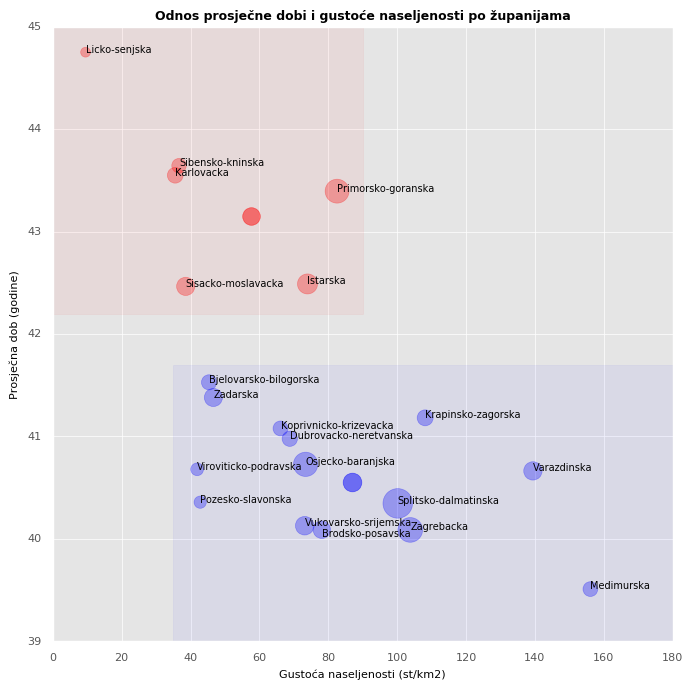

In [12]:
x = density.drop('Grad Zagreb').sort_index()
y = avg_ages['Total'].drop('Grad Zagreb').sort_index()
s = (total_per_county//1000).drop('Grad Zagreb').sort_index()

z = pd.DataFrame([x, y, s], index=['density', 'age', 'Size']).T

z1 = z[z.age > 42]
z2 = z[z.age < 42]

z1_d = (z1.density * z1.Size).sum() / z1.Size.sum()
z1_a = (z1.age * z1.Size).sum() / z1.Size.sum()
z1_s = z1.Size.sum() / z1.shape[0]
z2_d = (z2.density * z2.Size).sum() / z2.Size.sum()
z2_a = (z2.age * z2.Size).sum() / z2.Size.sum()
z2_s = z2.Size.sum() / z2.shape[0]


fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(z1.density, z1.age, s=z1.Size, alpha=0.3, color='r')
ax.scatter(z2.density, z2.age, s=z2.Size, alpha=0.3, color='b')

ax.scatter(z1_d, z1_a, s=z1_s, alpha=0.5, color='r')
ax.scatter(z2_d, z2_a, s=z2_s, alpha=0.5, color='b')

ax.fill_between(x=[0, 90], y1=42.2, y2=45, alpha=0.05, color='r')
ax.fill_between(x=[35, 180], y1=39, y2=41.7, alpha=0.05, color='b')

for i, txt in enumerate(z.index):
    if txt == 'Brodsko-posavska':
        ax.annotate(txt, (x[i], y[i]-0.07), fontsize=7)
        continue
    ax.annotate(txt, (x[i], y[i]), fontsize=7)

_ = (ax.set_ylim(39,45),
     ax.set_xlim(0, 180),
     ax.set_title('Odnos prosječne dobi i gustoće naseljenosti po županijama'),
     ax.set_ylabel('Prosječna dob (godine)', color='k'),
     ax.set_xlabel('Gustoća naseljenosti (st/km2)', color='k'),
     ax.tick_params(axis='both', length=0),
     plt.tight_layout(),
     plt.savefig('./figures/cro_demo_06.png'),
    )

---

In [13]:
z['logdens'] = np.log(z['density'])
z['sqrtdens'] = np.sqrt(z['density'])

np.corrcoef(z, rowvar=0)

array([[ 1.        , -0.61823823,  0.38645574,  0.91421072,  0.98269932],
       [-0.61823823,  1.        , -0.22623626, -0.70696305, -0.67039356],
       [ 0.38645574, -0.22623626,  1.        ,  0.48123473,  0.44865338],
       [ 0.91421072, -0.70696305,  0.48123473,  1.        ,  0.97268533],
       [ 0.98269932, -0.67039356,  0.44865338,  0.97268533,  1.        ]])

---

In [14]:
age_groups = dfc[dfc.AGE.str.contains('From|Less than 5')].copy()


def age_renamer(age):
    if age == 'Less than 5 years':
        return '0-4'
    else:
        return '{0[1]}-{0[3]}'.format(age.split())

age_groups['AGE'] = age_groups.AGE.map(age_renamer)
age_groups['Value'] = age_groups.Value.astype(int)
age_groups['GEO'] = age_groups.GEO.map(lambda x: x.replace(' zupanija', ''))
age_groups = age_groups[~age_groups.AGE.isin(['15-29', '30-49', '50-64', '65-84'])]


age_groups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 450 to 9224
Data columns (total 4 columns):
AGE      1320 non-null object
GEO      1320 non-null object
SEX      1320 non-null object
Value    1320 non-null int32
dtypes: int32(1), object(3)
memory usage: 46.4+ KB


In [15]:
def plot_county_pyramids(save=False):
    import matplotlib.gridspec as gridspec
    fig = plt.figure(figsize=(14, 20))
    outer_grid = gridspec.GridSpec(7, 3, wspace=0.05, hspace=0.20,
                                   left=0.01, right=0.99, bottom=0.01, top=0.98
                                  )
    
    counties = age_groups.loc[~(age_groups.GEO == 'Croatia'), 'GEO'].unique()
    counties = sorted(counties)
    
    for i, county in enumerate(counties):
        pyramid = age_groups[(age_groups.GEO == county) & ~(age_groups.SEX == 'Total')]
        m = pyramid[pyramid.SEX == 'Males'].set_index('AGE').Value
        f = pyramid[pyramid.SEX == 'Females'].set_index('AGE').Value
        
        inner_grid = gridspec.GridSpecFromSubplotSpec(1, 2, 
                              subplot_spec=outer_grid[i], wspace=0.0, hspace=0.0)
        
        ax1 = plt.Subplot(fig, inner_grid[0])
        ax2 = plt.Subplot(fig, inner_grid[1])
        m.plot(kind='barh', width=1, ax=ax1, legend=False, color='#348ABD')
        f.plot(kind='barh', width=1, ax=ax2, legend=False)
        ax1.invert_xaxis()
        ax1.set_title(county, loc='right', fontsize=9, ha='center')      
        
        for ax in [ax1, ax2]:
            ax.axis('off')
            fig.add_subplot(ax)
            
        if save:
            plt.savefig('./figures/cro_demo_07.png')       

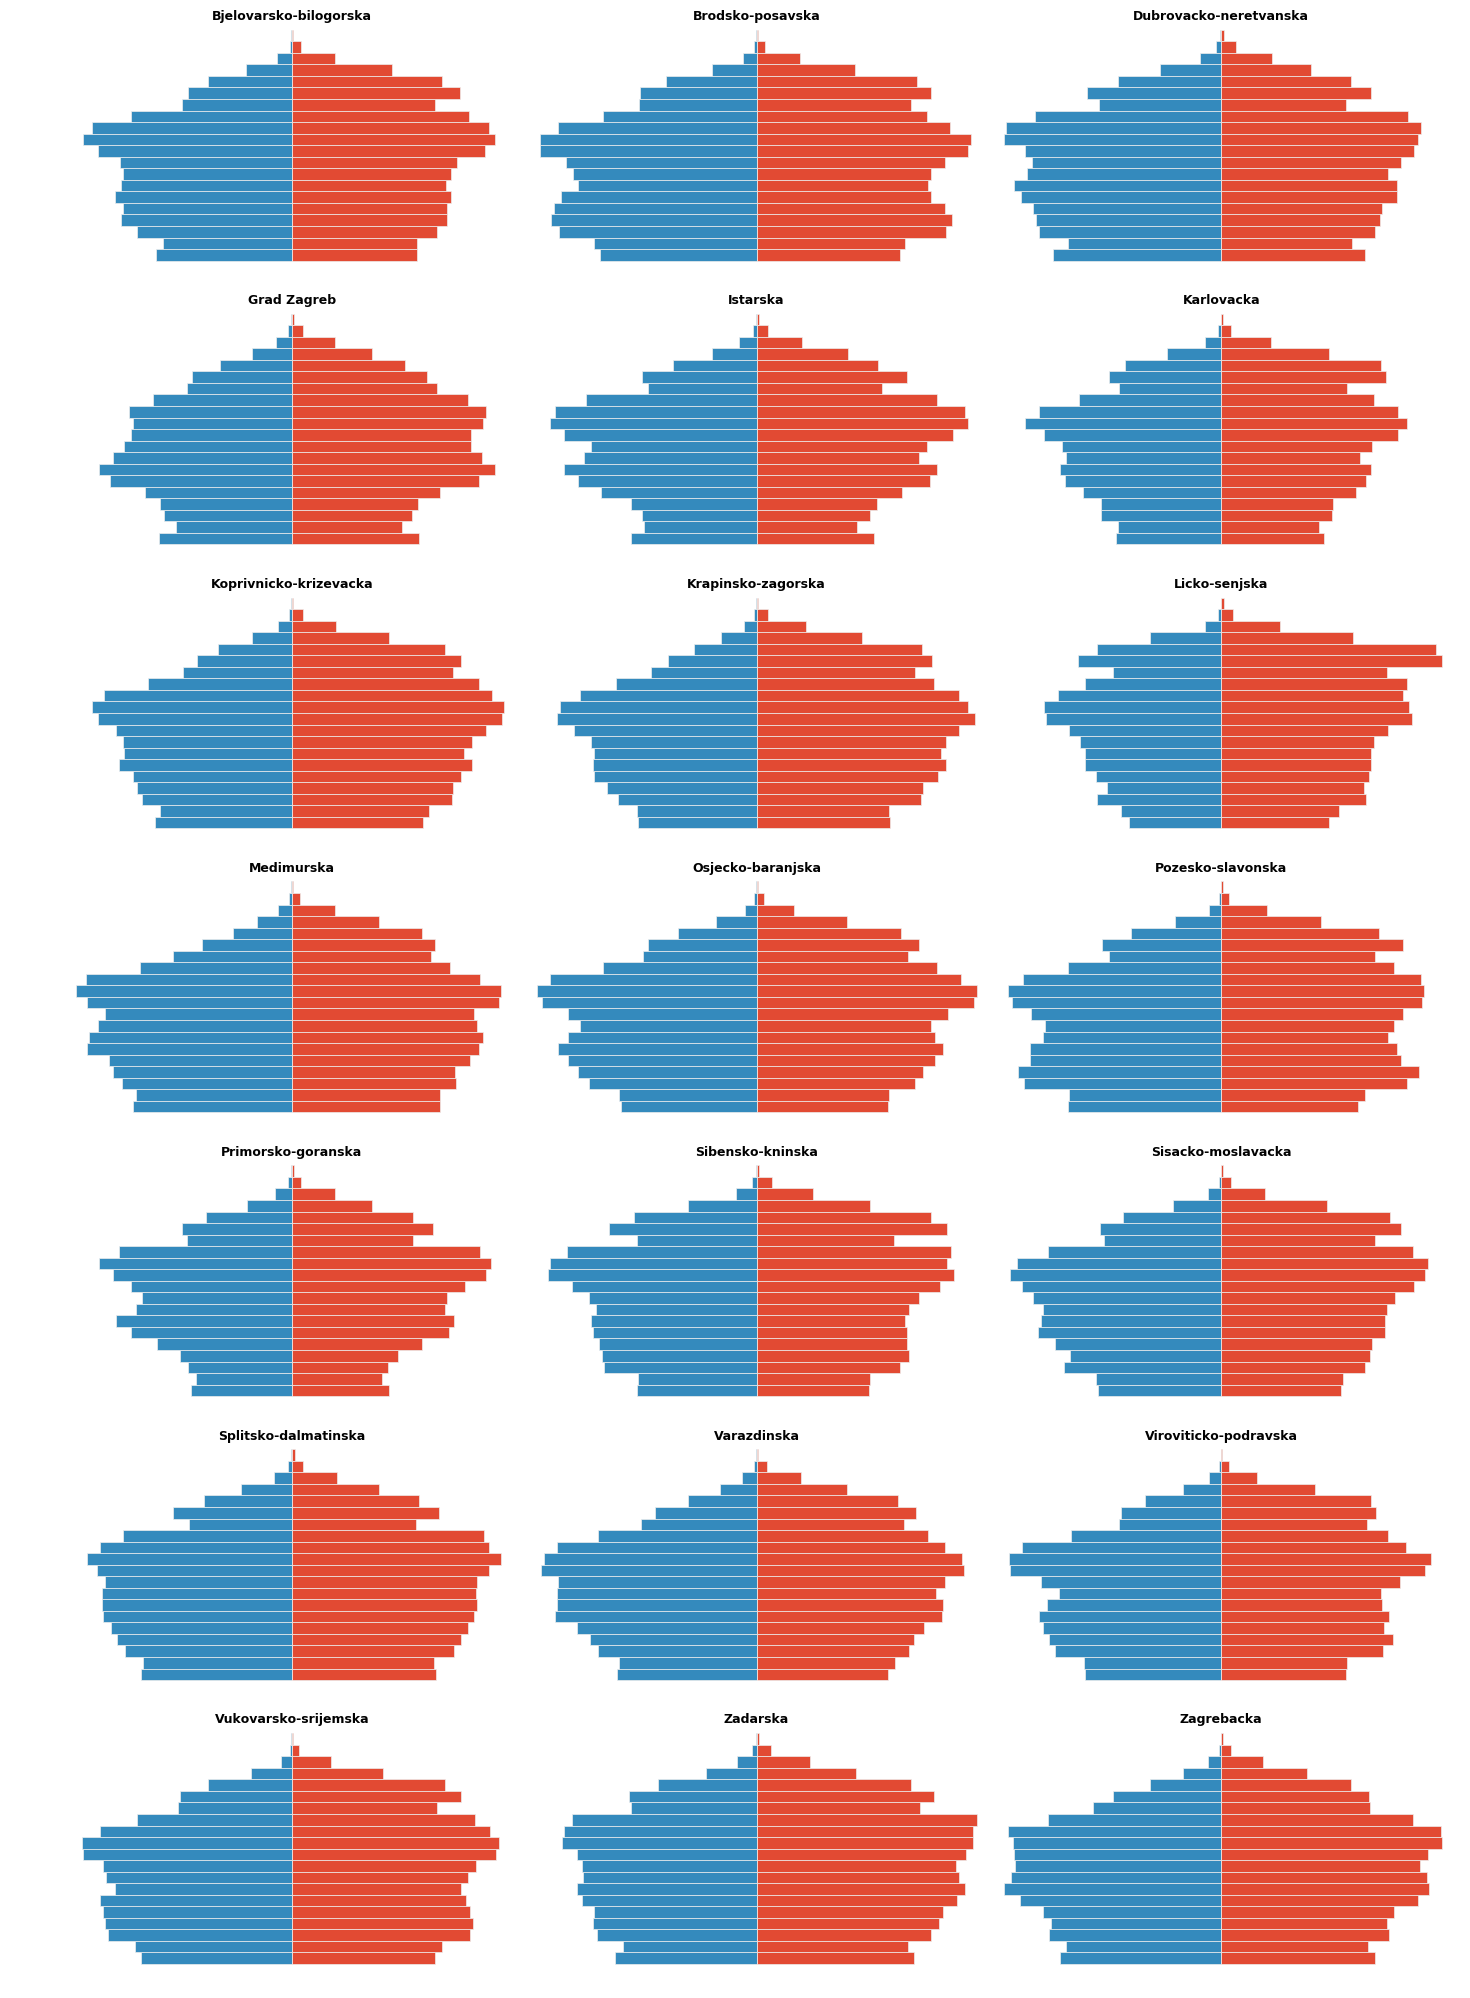

In [16]:
plot_county_pyramids(save=True)

---

In [1]:
from IPython.core.display import HTML
def css_styling(): 
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)

css_styling()